In [1]:
#importamos las librerias que vamos a usar en la eda
import pandas as pd

In [3]:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_union = pd.read_excel('df_union.xlsx')

In [5]:
from fastapi import FastAPI


In [6]:
app = FastAPI()


In [14]:
@app.get('/recomendacion/{titulo}')
def recomendacion(titulo: str):
    # Obtener las puntuaciones de la película de entrada
    pelicula_entrada = df_union[df_union['title'] == titulo]
    if pelicula_entrada.empty:
        return {"mensaje": f"No se encontró la película '{titulo}'."}
    puntuaciones_entrada = pelicula_entrada['vote_average'].values
    
    # Calcular la similitud de puntuación entre la película de entrada y las demás películas
    similitud = df_union['vote_average'].apply(lambda x: np.dot(x, puntuaciones_entrada) / (np.linalg.norm(x) * np.linalg.norm(puntuaciones_entrada)))
    
    # Ordenar las películas según el puntaje de similitud
    peliculas_similares = df_union.loc[similitud.argsort()[::-1]]
    
    # Seleccionar las 5 películas más similares
    recomendaciones = peliculas_similares['title'].head(5).tolist()
    
    return {"Recomendaciones": recomendaciones}

##EDA

In [36]:
import datetime
import seaborn as sns


In [35]:
print(df_union['vote_average'].dtype)


float64


<Axes: xlabel='vote_average'>

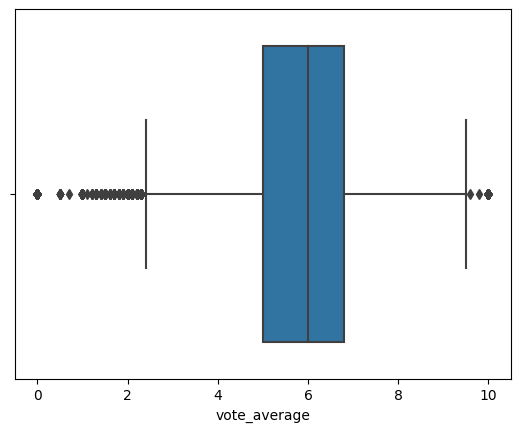

In [37]:
sns.boxplot(x=df_union['vote_average'])

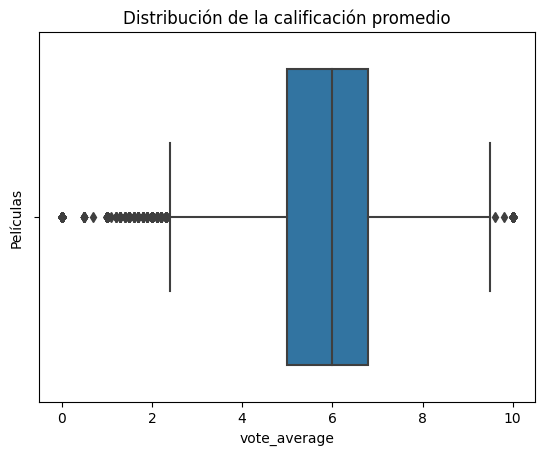

In [44]:
#analisamos el grafico para observar los outliers que se presentan en la tabla con respecto a los promedios que han recibido las peliculas
sns.boxplot(x=df_union['vote_average'], orient='h')
plt.xlabel('vote_average')
plt.ylabel('Películas')
plt.title('Distribución de la calificación promedio')
plt.xticks
plt.show()

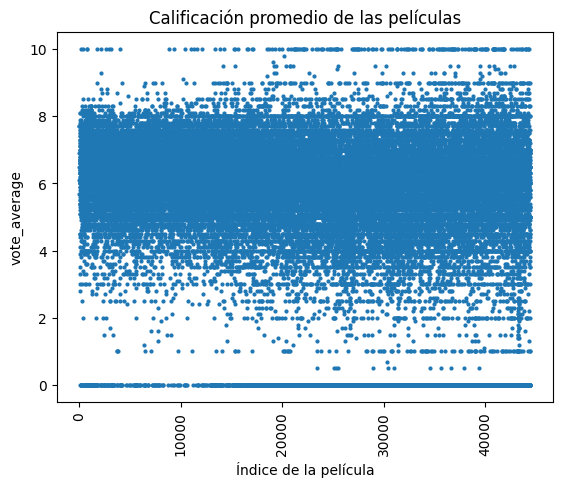

In [46]:
plt.plot(df_union['vote_average'], 'o', markersize=2)
plt.xlabel('Índice de la película')
plt.ylabel('vote_average')
plt.title('Calificación promedio de las películas')
plt.xticks(rotation=90)
plt.show()

In [38]:
print(df_union['vote_average'].describe())

count    44436.000000
mean         5.639002
std          1.894919
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64


In [11]:
# Mostrar las películas del género Drama con el mayor promedio de puntaje
print(top_drama_movies)

In [48]:
# Obtener el año actual
current_year = datetime.datetime.now().year

In [49]:
# Filtrar los datos para incluir solo los últimos 10 años
last_10_years = current_year - 9
filtered_data = df_union[df_union['release_year'] >= last_10_years]

# Calcular el promedio de recaudación en los últimos 10 años
revenue_avg = filtered_data['revenue'].mean()

El promedio de recaudación en los últimos 10 años es: 16815135.842349306


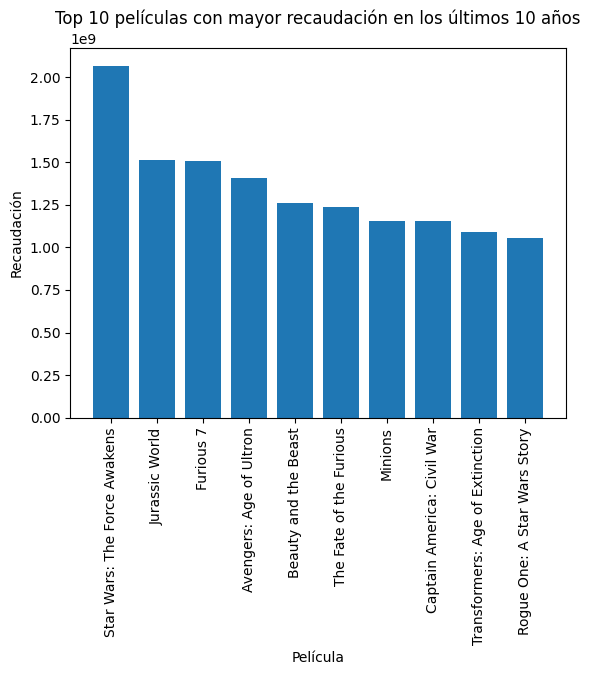

In [50]:
# Imprimir el promedio de recaudación
print(f"El promedio de recaudación en los últimos 10 años es: {revenue_avg}")

# Crear un gráfico de barras para visualizar las películas con mayor recaudación en los últimos 10 años
top_movies = filtered_data.nlargest(10, 'revenue')  # Obtener las 10 películas con mayor recaudación
plt.bar(top_movies['title'], top_movies['revenue'])
plt.xlabel('Película')
plt.ylabel('Recaudación')
plt.title('Top 10 películas con mayor recaudación en los últimos 10 años')
plt.xticks(rotation=90)
plt.show()

In [54]:
# Filtrar las películas de género "Acción"
accion_movies = df_union[df_union['generos'].str.contains('Action')]

In [55]:
# Obtener las 10 películas de género "Acción" con mayor puntaje promedio
top_accion_movies = accion_movies.nlargest(10, 'vote_average')

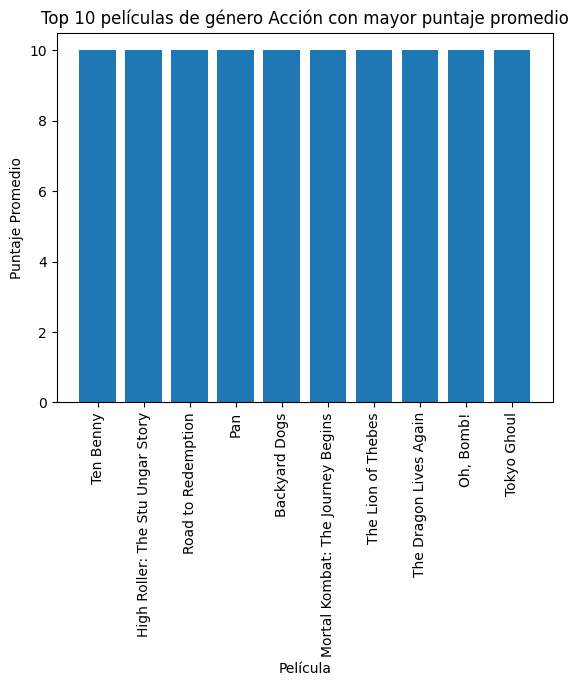

In [56]:
# Crear un gráfico de barras para visualizar las películas
plt.bar(top_accion_movies['title'], top_accion_movies['vote_average'])
plt.xlabel('Película')
plt.ylabel('Puntaje Promedio')
plt.title('Top 10 películas de género Acción con mayor puntaje promedio')
plt.xticks(rotation=90)
plt.show()